In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from utils import *

In [18]:
def _crocoddyl():
    """
    Returns trajectories starting from the circumference of a circle
    
    """
    xtest = circular()
    cost = []
    trajectory = []
    iterations = []
    for xyz in xtest:
        model = crocoddyl.ActionModelUnicycle()
        T = 150
        model.costWeights = np.matrix([1,1]).T
        problem = crocoddyl.ShootingProblem(m2a(xyz).T, [ model ] * T, model)
        ddp = crocoddyl.SolverDDP(problem)
        ddp.solve([], [], 1000)
        if ddp.iter < 100:
            xs_ = np.array(ddp.xs)
            xs = xs_[:,0:2]
            cost.append(ddp.cost)
            trajectory.append(xs)
            iterations.append(ddp.iter)

    return cost, trajectory, iterations

In [19]:
c, t, i = _crocoddyl()

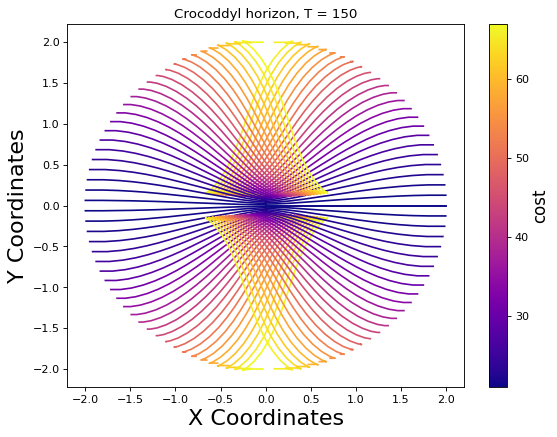

In [21]:
plot_trajectories(c, t, "cost", savename = "CostHorizon", title = "Crocoddyl horizon, T = 150")